In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

In [2]:
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [3]:
import nltk
#nltk.download_shell()

In [4]:
yelp = pd.read_csv('yelp.csv')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp.isna().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

<AxesSubplot:xlabel='stars', ylabel='count'>

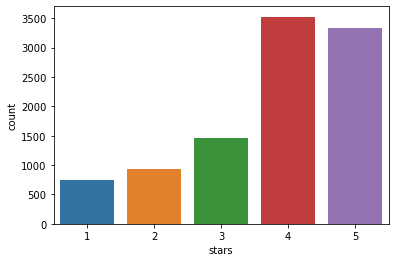

In [8]:
sns.countplot(data=yelp, x='stars')

In [9]:
yelp['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [10]:
yelp['user_id'].value_counts()

fczQCSmaWF78toLEmb0Zsw    38
0CMz8YaO3f8xu4KqQgKb9Q    25
90a6z--_CUrl84aCzZyPsg    22
4ozupHULqGyO42s3zNUzOQ    18
0mqHhdKEdak_A1FBhFNXqA    18
                          ..
gc4rNAgbGydNMAPJ85FZag     1
Aj7Gx0gmjb-tX9tJ4IvqKQ     1
pmkI2GIZ9Qh9LlHjey-w5A     1
Gk3VxZ95do0-WgeVuGMVWA     1
Foe_x9I0OhY1hp62BtFSgQ     1
Name: user_id, Length: 6403, dtype: int64

In [11]:
yelp['business_id'].value_counts()

ntN85eu27C04nwyPa8IHtw    37
JokKtdXU7zXHcr20Lrk29A    37
hW0Ne_HTHEAgGF1rAdmR-g    34
WNy1uzcmm_UHmTyR--o5IA    32
VVeogjZya58oiTxK7qUjAQ    31
                          ..
sAwxt4I4gTiL-08nyarJbg     1
G2HtiETaLokw0kvACS_gKw     1
_uy2i0KjsilMG0kGHr9q8Q     1
FGTbFEyNmsPoDoD93T8iSg     1
u3HMalNH-xBgZUXjnH3O6Q     1
Name: business_id, Length: 4174, dtype: int64

In [12]:
yelp['type'].value_counts()

review    10000
Name: type, dtype: int64

In [13]:
yelp['date'].value_counts()

2011-03-28    21
2012-01-03    19
2012-11-25    18
2012-04-12    18
2012-06-18    17
              ..
2009-08-20     1
2009-02-14     1
2009-06-29     1
2007-02-22     1
2008-12-18     1
Name: date, Length: 1995, dtype: int64

In [14]:
yelp['text length']=yelp['text'].apply(len)
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<AxesSubplot:xlabel='text length', ylabel='Count'>

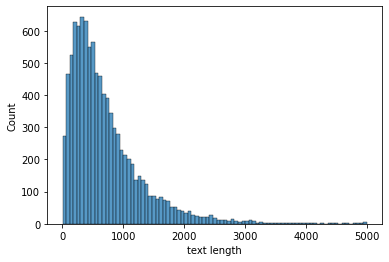

In [15]:
sns.histplot(data=yelp, x='text length')

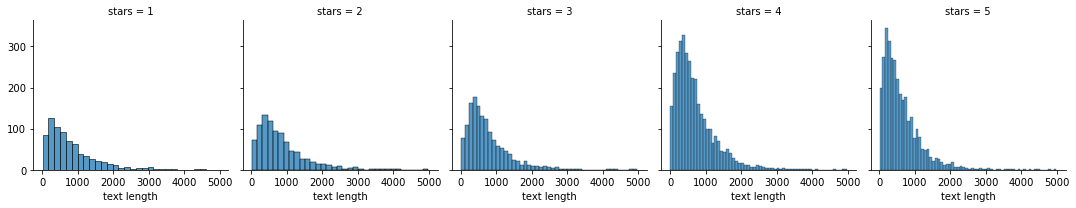

In [16]:
g = sns.FacetGrid(yelp, col="stars")
g.map_dataframe(sns.histplot, "text length")

<AxesSubplot:xlabel='stars', ylabel='text length'>

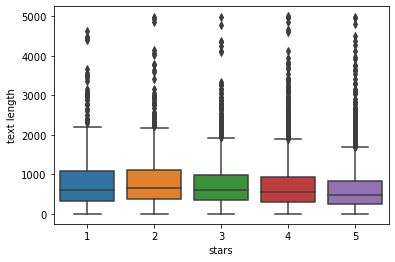

In [17]:
sns.boxplot(data=yelp, x='stars', y='text length')

In [18]:
yelp.groupby('stars').count()

,business_id,date,review_id,text,type,user_id,cool,useful,funny,text length
stars,,,,,,,,,,
1,749,749,749,749,749,749,749,749,749,749
2,927,927,927,927,927,927,927,927,927,927
3,1461,1461,1461,1461,1461,1461,1461,1461,1461,1461
4,3526,3526,3526,3526,3526,3526,3526,3526,3526,3526
5,3337,3337,3337,3337,3337,3337,3337,3337,3337,3337


In [19]:
yelp.groupby('stars').mean()

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [20]:
yelp.groupby('stars').corr()

cool    useful     funny  text length
stars                                                       
1     cool         1.000000  0.759015  0.802161     0.276812
      useful       0.759015  1.000000  0.667355     0.334015
      funny        0.802161  0.667355  1.000000     0.261910
      text length  0.276812  0.334015  0.261910     1.000000
2     cool         1.000000  0.785922  0.826350     0.276901
      useful       0.785922  1.000000  0.669214     0.306575
      funny        0.826350  0.669214  1.000000     0.265515
      text length  0.276901  0.306575  0.265515     1.000000
3     cool         1.000000  0.853302  0.832051     0.260068
      useful       0.853302  1.000000  0.760241     0.300406
      funny        0.832051  0.760241  1.000000     0.256729
      text length  0.260068  0.300406  0.256729     1.000000
4     cool         1.000000  0.902031  0.851593     0.273000
      useful       0.902031  1.000000  0.794473     0.308183
      funny        0.851593  0.794473  1.000000     0.233477
      text length  0.273000  0.308183  0.233477     1.000000
5     cool         1.000000  0.926913  0.718411     0.237470
      useful       0.926913  1.000000  0.692654     0.278288
      funny        0.718411  0.692654  1.000000     0.251961
      text length  0.237470  0.278288  0.251961     1.000000

In [21]:
yelp.groupby('stars').mean().corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

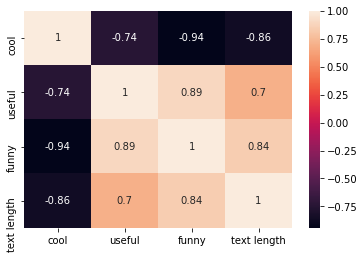

In [22]:
sns.heatmap(yelp.groupby('stars').mean().corr(), annot=True)

In [23]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [24]:
X = yelp_class['text']
y = yelp_class['stars']

In [25]:
def clean_mess(message):
    import string
    from nltk.corpus import stopwords
    punct = string.punctuation.replace("'","")
    a = message.translate(str.maketrans('','',punct))
    a = a.replace('\n',' ')
    a = a.split()
    b = [x for x in a if x.lower() not in stopwords.words('english')]
    return b

In [26]:
cv = CountVectorizer()
X=cv.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 101)
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

In [30]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])

In [31]:
X = yelp_class['text']
y = yelp_class['stars']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [32]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [34]:
predictions = pipeline.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lucas\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install tensorflow